# 1. Get, Visualize and Prepare Data

https://www.kaggle.com/datasets/ishans24/brain-tumor-dataset

## 1.1 Getting data from Kaggle

In [ ]:
!pip install opendatasets -q

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/ishans24/brain-tumor-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: afreenhossain
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ishans24/brain-tumor-dataset


100%|██████████| 862M/862M [00:03<00:00, 234MB/s]


In [ ]:
import os

directory = "/content/brain-tumor-dataset"

glioma_files = 0
meningioma_files = 0
notumor_files = 0
pituitary_files = 0

for entry in os.scandir(directory):
  print(entry)

  if entry.is_dir():
    # for file in os.scandir(entry.path):
    #   print(file.name)
    for file in os.scandir(entry.path):
      if entry.name == 'glioma':
        glioma_files += 1
      elif entry.name == 'meningioma':
        meningioma_files += 1
      elif entry.name == 'no_tumor':
        notumor_files += 1
      elif entry.name == 'pituitary':
        pituitary_files += 1

print(f"Glioma files: {glioma_files}")
print(f"Meningioma files: {meningioma_files}")
print(f"No Tumor files: {notumor_files}")
print(f"Pituitary files: {pituitary_files}")

<DirEntry 'no_tumor'>
<DirEntry 'glioma'>
<DirEntry 'meningioma'>
<DirEntry 'pituitary'>
Glioma files: 3754
Meningioma files: 2343
No Tumor files: 1757
Pituitary files: 2706


## 1.2 Visualizing data

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def visualize_images(root_dir, rows=5, cols=5):
  all_images = []

  for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
      for file in os.listdir(folder_path):
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
          all_images.append((os.path.join(folder_path, file), folder))

  random.shuffle(all_images)

  print("First 6 paths and folder names of images:\n")
  print(all_images[:6], "\n\n")

  sample_images = all_images[:rows*cols] # take rows*cols no. of images

  plt.figure(figsize=(12, 10))
  for i, (img_path, label) in enumerate(sample_images):
    img = mpimg.imread(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(label, fontsize=9)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

First 6 paths and folder names of images:

[('/content/brain-tumor-dataset/pituitary/pituitary2539.jpg', 'pituitary'), ('/content/brain-tumor-dataset/pituitary/pituitary724.png', 'pituitary'), ('/content/brain-tumor-dataset/glioma/glioma2105.jpg', 'glioma'), ('/content/brain-tumor-dataset/meningioma/meningioma161.png', 'meningioma'), ('/content/brain-tumor-dataset/glioma/glioma2506.jpg', 'glioma'), ('/content/brain-tumor-dataset/pituitary/pituitary1041.jpg', 'pituitary')] 




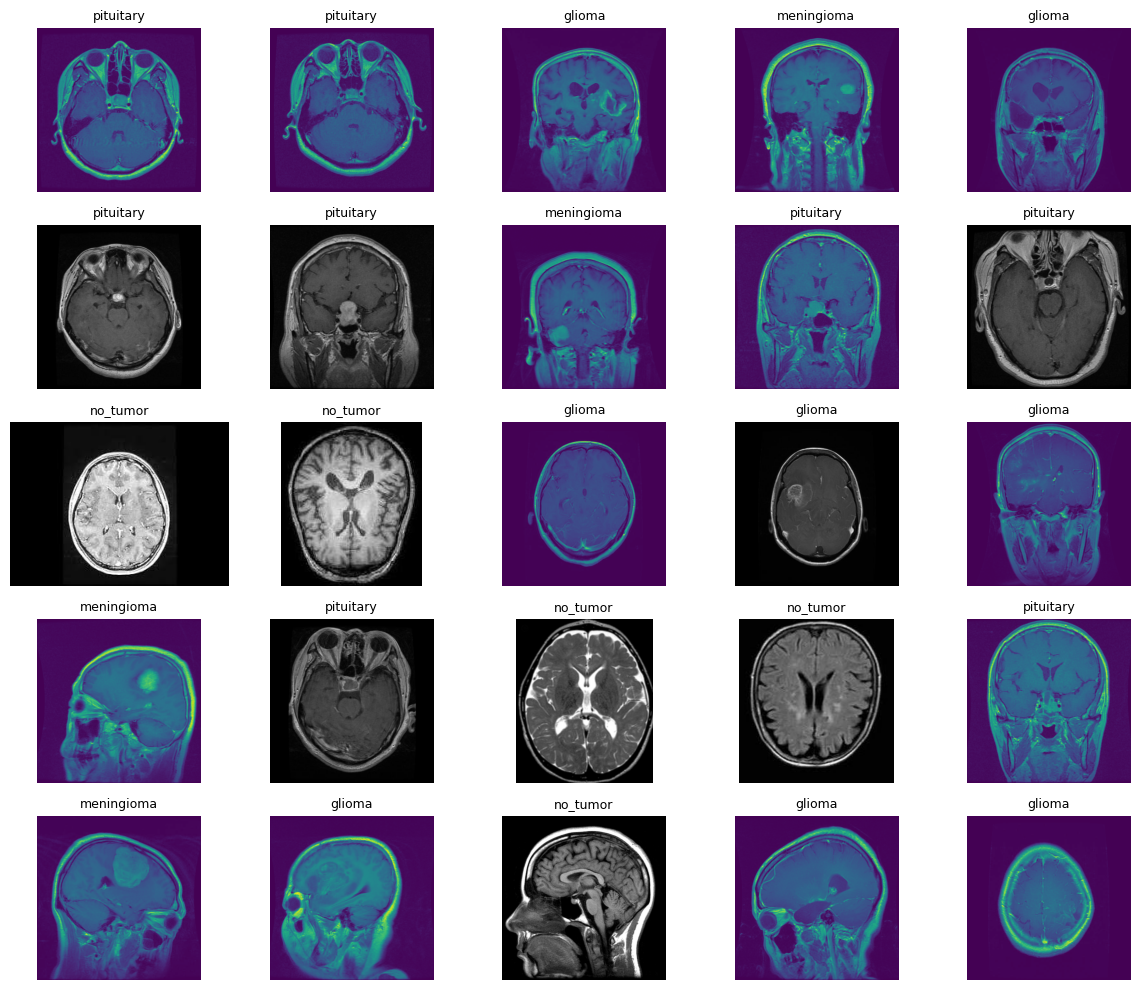

In [ ]:
root_dir = "/content/brain-tumor-dataset"
visualize_images(root_dir)

## 1.3 Preparing data

Preprocess the images and split the data into training, validation, and test sets

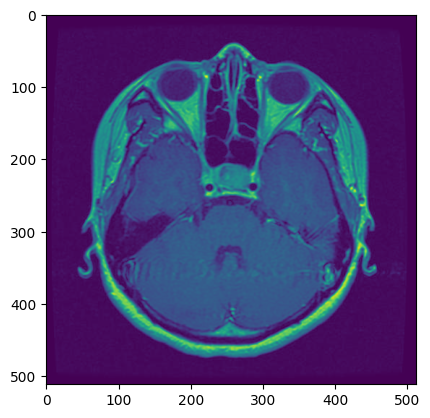

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread("/content/brain-tumor-dataset/pituitary/pituitary2539.jpg")
plt.imshow(img)

In [ ]:
print(img.shape)

(512, 512)


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [ ]:
def prepare_data(root_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, batch_size=32, img_size=(224, 224), num_workers=2):
  transform = transforms.Compose([
      transforms.Resize(img_size),
      transforms.ToTensor(),
      transforms.Normalize(
          mean=[0.485, 0.456, 0.406],
          std=[0.229, 0.224, 0.225]
      )
  ])

  full_dataset = datasets.ImageFolder(root=root_dir, transform=transform)
  dataset_size = len(full_dataset)

  train_size = int(train_ratio * dataset_size)
  val_size = int(val_ratio * dataset_size)
  test_size = dataset_size - train_size - val_size

  train_ds, val_ds, test_ds = random_split(full_dataset, [train_size, val_size, test_size])

  train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers)
  val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers)
  test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers)

  print(f"Total images: {dataset_size}\n")
  print(f"train_ds: {train_ds} | val_ds: {val_ds} | test_ds: {test_ds}\n")
  print(f"Train: {len(train_ds)} | Val: {len(val_ds)} | Test: {len(test_ds)}\n")
  print(f"Classes: {full_dataset.classes}")

  return train_loader, val_loader, test_loader, full_dataset.classes, full_dataset

In [ ]:
root_dir = "/content/brain-tumor-dataset"

train_loader, val_loader, test_loader, class_names, full_dataset = prepare_data(root_dir=root_dir, img_size=(224, 224), batch_size=32)

Total images: 10560

train_ds: <torch.utils.data.dataset.Subset object at 0x79f339b31f70> | val_ds: <torch.utils.data.dataset.Subset object at 0x79f339b320f0> | test_ds: <torch.utils.data.dataset.Subset object at 0x79f339b339b0>

Train: 7391 | Val: 1584 | Test: 1585

Classes: ['glioma', 'meningioma', 'no_tumor', 'pituitary']


In [ ]:
next(iter(train_loader))

[tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.0837, -2.0837, -2.0837],
           ...,
           [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.1008, -2.1008],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.1008, -2.1008],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.1008, -2.1008]],
 
          [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0007, -2.0007, -2.0007],
           ...,
           [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -2.0182, -2.0182],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -2.0182, -2.0182],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -2.0182, -2.0182]],
 
          [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
           [-

In [ ]:
full_dataset

Dataset ImageFolder
    Number of datapoints: 10560
    Root location: /content/brain-tumor-dataset
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
full_dataset.class_to_idx

{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}

In [ ]:
full_dataset.transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

## 1.4 Visualize preprocessed data

In [ ]:
import torch

In [ ]:
import matplotlib.pyplot as plt

def visualize_from_loader(loader, classes, n=25):
  images, labels = next(iter(loader))  # grab one batch
  n = min(n, len(images))
  plt.figure(figsize=(10, 10))
  for i in range(n):
    plt.subplot(5, 5, i + 1)
    img = images[i].permute(1, 2, 0)  # (C,H,W) → (H,W,C)
    # Unnormalize (for visualization)
    # img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    img = img.clamp(0, 1)
    plt.imshow(img)
    plt.title(classes[labels[i]])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

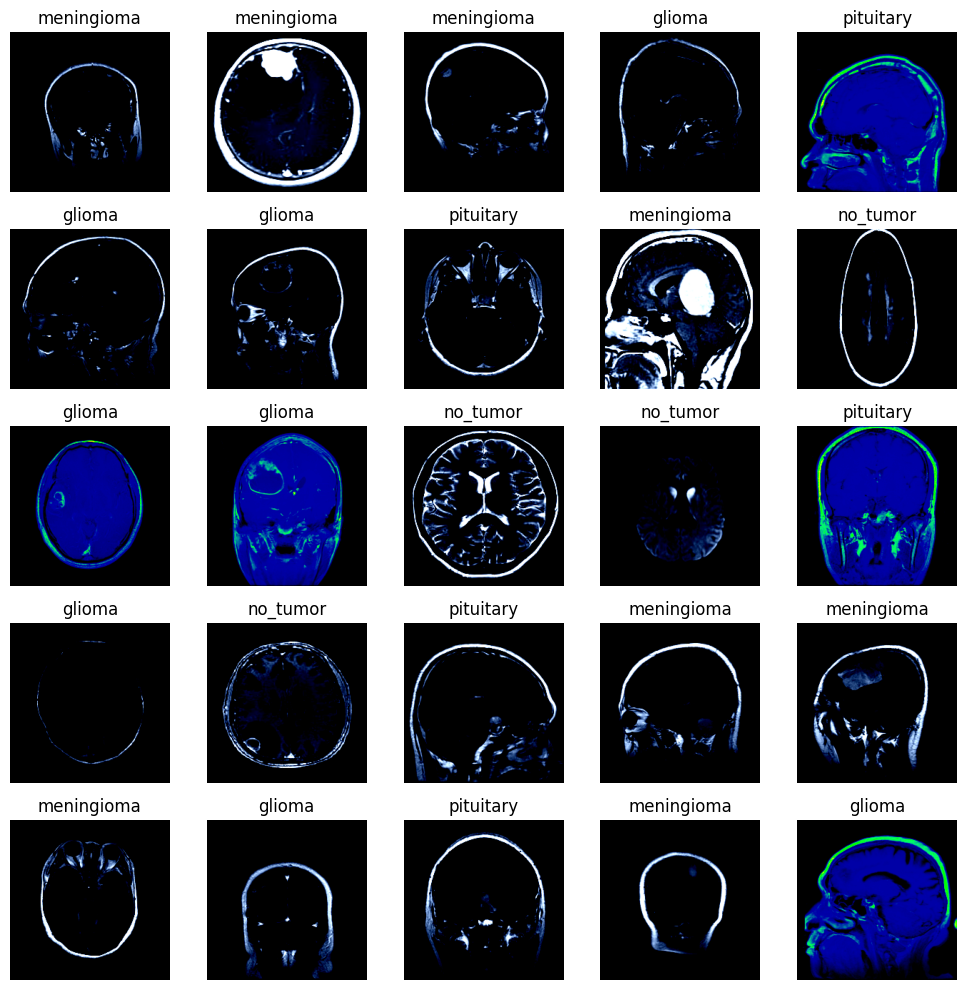

In [ ]:
visualize_from_loader(train_loader, class_names)

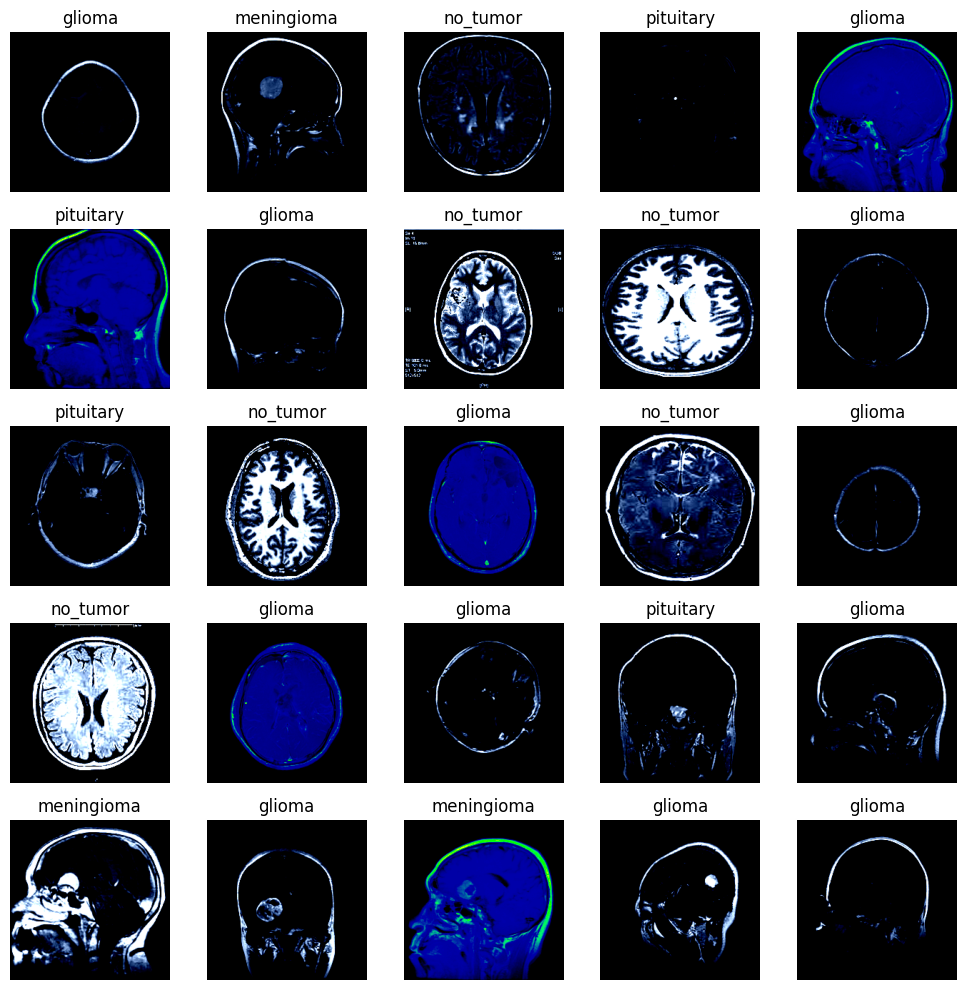

In [ ]:
visualize_from_loader(test_loader, class_names)

In [ ]:
from collections import Counter

def count_classes_in_loader(loader, classes):
  counts = Counter()
  for _, labels in loader:
    for lbl in labels.tolist():
      counts[lbl] += 1
  for idx, cls in enumerate(classes):
    print(f"{cls}: {counts[idx]}")

In [ ]:
print("Train distribution:")
count_classes_in_loader(train_loader, class_names)

print("\nValidation distribution:")
count_classes_in_loader(val_loader, class_names)

print("\nTest distribution:")
count_classes_in_loader(test_loader, class_names)

Train distribution:
glioma: 2639
meningioma: 1645
no_tumor: 1238
pituitary: 1869

Validation distribution:
glioma: 543
meningioma: 351
no_tumor: 248
pituitary: 442

Test distribution:
glioma: 572
meningioma: 347
no_tumor: 271
pituitary: 395


# 2. Building a model

## 2.1 A simple CNN model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class BrainTumorCNN(nn.Module):
  def __init__(self, num_classes=4):
    super().__init__()

    self.conv1 = nn.Conv2d(3, 32, kernel_size=1, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

    self.pool = nn.MaxPool2d(2, 2)
    self.dropout = nn.Dropout(0.3)

    self.fc1 = nn.Linear(128 * 28 * 28, 256)  # 224 -> 112 -> 56 -> 28 after pooling 3 times
    self.fc2 = nn.Linear(256, num_classes)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))  # [3,224,224] -> [32,112,112]
    x = self.pool(F.relu(self.conv2(x)))  # -> [64,56,56]
    x = self.pool(F.relu(self.conv3(x)))  # -> [128,28,28]
    x = x.view(x.size(0), -1)             # flatten
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.fc2(x)
    return x

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = BrainTumorCNN(num_classes=len(class_names)).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## 2.2 Training model

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10, device='cpu'):
  history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

  for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0, 0, 0

    for imgs, labels in train_loader:
      imgs, labels = imgs.to(device), labels.to(device)
      optimizer.zero_grad()

      outputs = model(imgs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      _, preds = torch.max(outputs, 1)
      correct += (preds == labels).sum().item()
      total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
      for imgs, labels in val_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        val_correct += (preds == labels).sum().item()
        val_total += labels.size(0)

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total

    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} "
          f"| Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

  return history

For each epoch, the model iterates over every batch in the training data.
It computes the loss and accuracy for each batch, accumulates them across all batches, and then averages the results to get the overall training performance for that epoch.

After that, the model goes through all batches in the validation set, calculating and averaging the validation loss and accuracy in the same way.

This entire process is then repeated for the next epoch, meaning the model trains and validates on all batches once per epoch, for the total number of specified epochs.


In [ ]:
history = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=30, device=device)

Epoch [1/30] Train Loss: 0.7754 | Val Loss: 0.5086 | Train Acc: 0.7119 | Val Acc: 0.7847
Epoch [2/30] Train Loss: 0.4132 | Val Loss: 0.3389 | Train Acc: 0.8345 | Val Acc: 0.8693
Epoch [3/30] Train Loss: 0.2819 | Val Loss: 0.2294 | Train Acc: 0.8939 | Val Acc: 0.9211
Epoch [4/30] Train Loss: 0.1784 | Val Loss: 0.2181 | Train Acc: 0.9307 | Val Acc: 0.9337
Epoch [5/30] Train Loss: 0.1177 | Val Loss: 0.1905 | Train Acc: 0.9613 | Val Acc: 0.9470
Epoch [6/30] Train Loss: 0.0965 | Val Loss: 0.2107 | Train Acc: 0.9656 | Val Acc: 0.9388
Epoch [7/30] Train Loss: 0.0616 | Val Loss: 0.1955 | Train Acc: 0.9801 | Val Acc: 0.9470
Epoch [8/30] Train Loss: 0.0354 | Val Loss: 0.2135 | Train Acc: 0.9885 | Val Acc: 0.9552
Epoch [9/30] Train Loss: 0.0472 | Val Loss: 0.1723 | Train Acc: 0.9836 | Val Acc: 0.9577
Epoch [10/30] Train Loss: 0.0579 | Val Loss: 0.1593 | Train Acc: 0.9830 | Val Acc: 0.9577
Epoch [11/30] Train Loss: 0.0316 | Val Loss: 0.2261 | Train Acc: 0.9889 | Val Acc: 0.9564
Epoch [12/30] Train

In [ ]:
history

{'train_loss': [0.7753632951737482,
  0.4131846854955087,
  0.28188971517147954,
  0.17837770311444096,
  0.11773485371044703,
  0.09648129275044451,
  0.061578709876076096,
  0.035373367530190956,
  0.04721760009798459,
  0.05791143069620289,
  0.03162989373070901,
  0.030110151815857866,
  0.031023762478551486,
  0.027513011767108395,
  0.02433054715084911,
  0.018850792761039376,
  0.013986608144418882,
  0.02162346239132902,
  0.027626367847135822,
  0.021917401733864285,
  0.020167442951236753,
  0.01996999199040446,
  0.016515305288708648,
  0.023957869918203437,
  0.02423100295435023,
  0.016317446885209176,
  0.017031991167637598,
  0.026434272733831084,
  0.013951099853615099,
  0.005499924934689296],
 'val_loss': [0.5085523980855942,
  0.33891046583652495,
  0.2293598649650812,
  0.21807960782200098,
  0.19049943011254072,
  0.2106731116399169,
  0.19552037369459868,
  0.2134800881287083,
  0.17228150486946106,
  0.15925188113935293,
  0.22606229859869928,
  0.298724532593041

## 2.3 Visualizing training history

In [ ]:
def plot_history(history):
  plt.figure(figsize=(10, 4))

  plt.subplot(1, 2, 1)
  plt.plot(history["train_loss"], label="Train Loss")
  plt.plot(history["val_loss"], label="Val Loss")
  plt.title("Loss over epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(history['train_acc'], label='Train Acc')
  plt.plot(history['val_acc'], label='Val Acc')
  plt.title('Accuracy over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

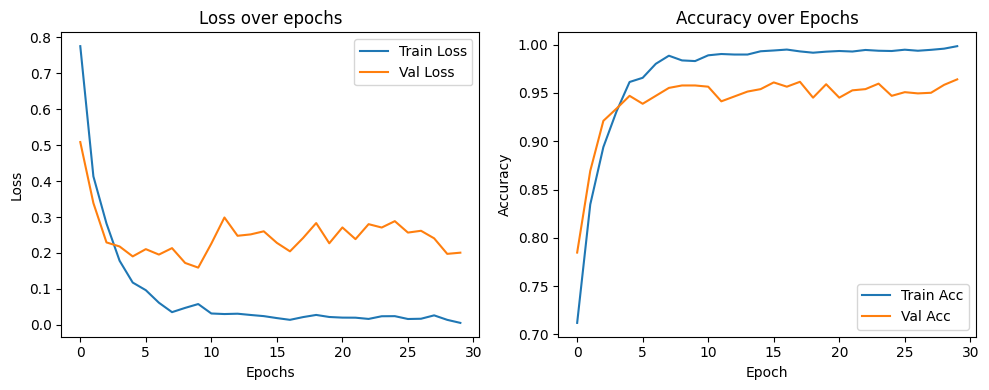

In [ ]:
plot_history(history)

# 3. Evaluate model & Visualize predictions

## 3.1 Evaluate model

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np

In [ ]:
def evaluate_model(model, test_loader, device='cpu'):
  model.eval()
  all_preds, all_labels = [], []

  with torch.no_grad():
    for imgs, labels in test_loader:
      imgs, labels = imgs.to(device), labels.to(device)
      outputs = model(imgs)
      _, preds = torch.max(outputs, 1)
      all_preds.extend(preds.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  acc = accuracy_score(all_labels, all_preds)
  print(f"Test Accuracy: {acc:.4f}")

  cm = confusion_matrix(all_labels, all_preds)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
  disp.plot(cmap='Blues', xticks_rotation=45)
  plt.title("Confusion Matrix")
  plt.show()

Test Accuracy: 0.9502


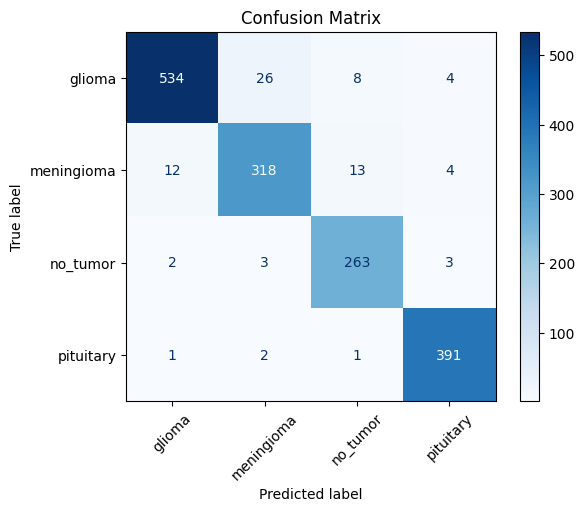

In [ ]:
evaluate_model(model, test_loader, device)

1. Glioma
- Correctly predicted: 534
- Misclassified as meningioma (26), no_tumor (8), pituitary (4)

So most glioma images are recognized correctly.
Accuracy for glioma ≈ 534 / (534 + 26 + 8 + 4) ≈ 93.8%

---

2. Meningioma- Correctly predicted: 318
- Misclassified as glioma (12), no_tumor (13), pituitary (4)
- Slight confusion with glioma and no_tumor

Accuracy for meningioma ≈ 318 / (318 + 12 + 13 + 4) ≈ 90.6%

---

3. No Tumor
- Correctly predicted: 263
- Misclassified as glioma (2), meningioma (3), pituitary (3)

Accuracy for no_tumor ≈ 263 / (263 + 2 + 3 + 3) ≈ 96.6%

---

4. Pituitary
- Correctly predicted: 391
- Misclassified as glioma (1), meningioma (2), no_tumor (1)

Accuracy for pituitary ≈ 391 / (391 + 1 + 2 + 1) ≈ 98.7%

In [ ]:
import numpy as np

def classwise_accuracy(cm, class_names=None, verbose=True):
  """
  Compute accuracy per class from a confusion matrix.

  Args:
      cm (np.ndarray): Confusion matrix (square array, shape [num_classes, num_classes])
      class_names (list, optional): Names of classes in order of cm rows/cols
      verbose (bool): Print class accuracies if True

  Returns:
      dict: {class_name or class_index: accuracy}
  """
  per_class_acc = {}
  for i in range(len(cm)):
    correct = cm[i, i]
    total = cm[i].sum()
    acc = correct / total if total > 0 else 0
    name = class_names[i] if class_names else f"class_{i}"
    per_class_acc[name] = acc
    if verbose:
      print(f"{name:15s} → Accuracy: {acc:.4f} ({int(correct)}/{int(total)})")

  overall = np.trace(cm) / np.sum(cm)
  if verbose:
    print(f"\nOverall accuracy: {overall:.4f}")

  return per_class_acc

In [ ]:
cm = np.array([
  [534, 26, 8, 4],
  [12, 318, 13, 4],
  [2, 3, 263, 3],
  [1, 2, 1, 391]
])

class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
acc_per_class = classwise_accuracy(cm, class_names)

glioma          → Accuracy: 0.9336 (534/572)
meningioma      → Accuracy: 0.9164 (318/347)
no_tumor        → Accuracy: 0.9705 (263/271)
pituitary       → Accuracy: 0.9899 (391/395)

Overall accuracy: 0.9502


In [ ]:
acc_per_class

{'glioma': np.float64(0.9335664335664335),
 'meningioma': np.float64(0.9164265129682997),
 'no_tumor': np.float64(0.9704797047970479),
 'pituitary': np.float64(0.9898734177215189)}

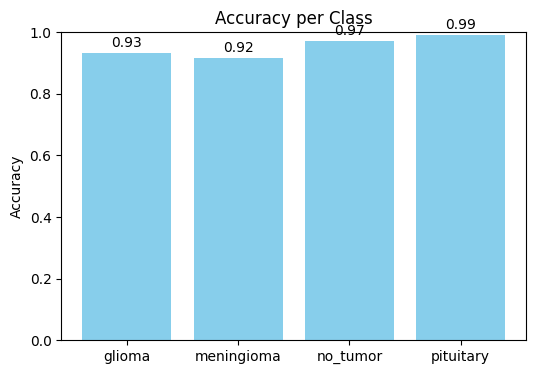

In [ ]:
def plot_classwise_accuracy(acc_dict):
  names = list(acc_dict.keys())
  values = list(acc_dict.values())
  plt.figure(figsize=(6,4))
  plt.bar(names, values, color='skyblue')
  plt.title("Accuracy per Class")
  plt.ylim(0, 1)
  plt.ylabel("Accuracy")
  for i, v in enumerate(values):
      plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
  plt.show()

plot_classwise_accuracy(acc_per_class)

## 3.2 Visualize predictions

In [ ]:
def visualize_random_samples(model, loader, classes, device='cpu', n=25):
  model.eval()
  imgs_list, labels_list = [], []

  # Collect some random samples from the loader
  for imgs, labels in loader:
    imgs_list.append(imgs)
    labels_list.append(labels)

  imgs = torch.cat(imgs_list)
  labels = torch.cat(labels_list)

  # Pick random indices
  idxs = torch.randperm(len(imgs))[:n]
  imgs, labels = imgs[idxs], labels[idxs]
  imgs, labels = imgs.to(device), labels.to(device)

  outputs = model(imgs)
  _, preds = torch.max(outputs, 1)

  plt.figure(figsize=(10,10))
  for i in range(len(imgs)):
    plt.subplot(5,5,i+1)
    img = imgs[i].cpu().permute(1,2,0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    img = img.clamp(0,1)
    plt.imshow(img)
    color = 'green' if preds[i] == labels[i] else 'red'
    plt.title(f"T:{classes[labels[i]]}\nP:{classes[preds[i]]}", color=color, fontsize=8)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

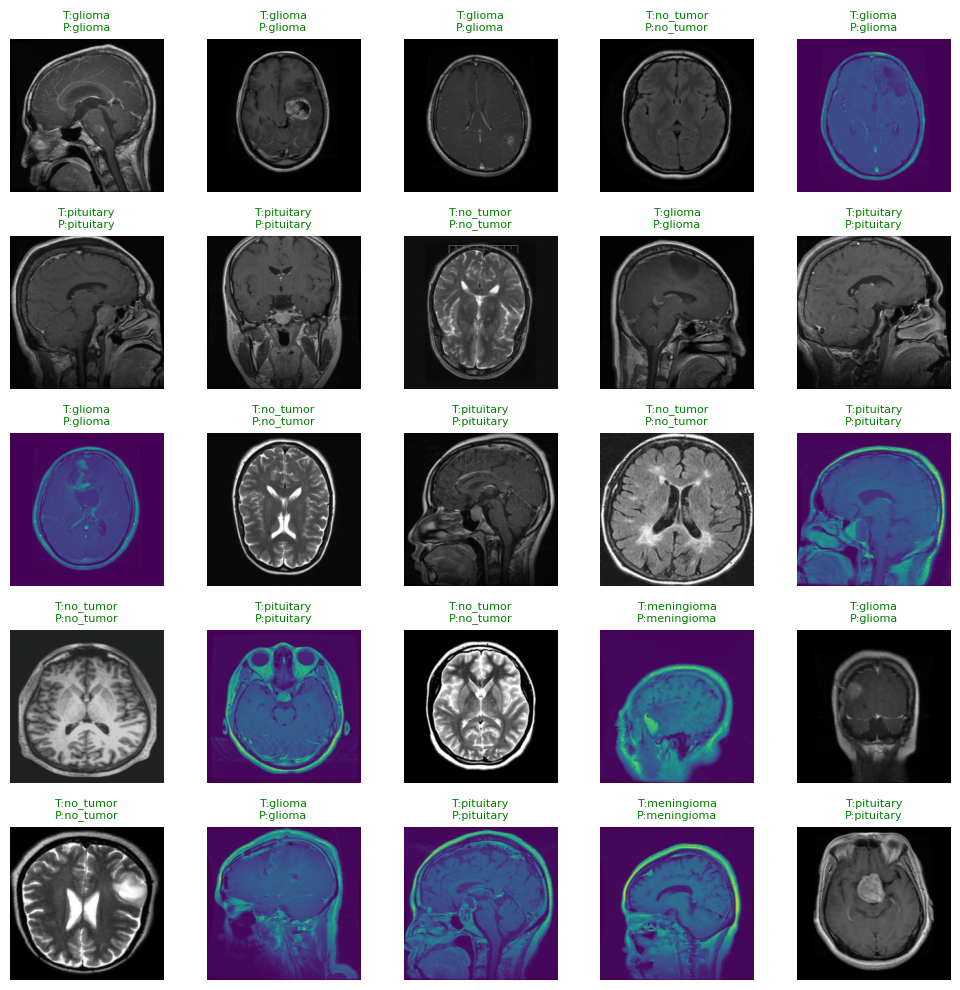

In [ ]:
visualize_random_samples(model, test_loader, class_names, device)

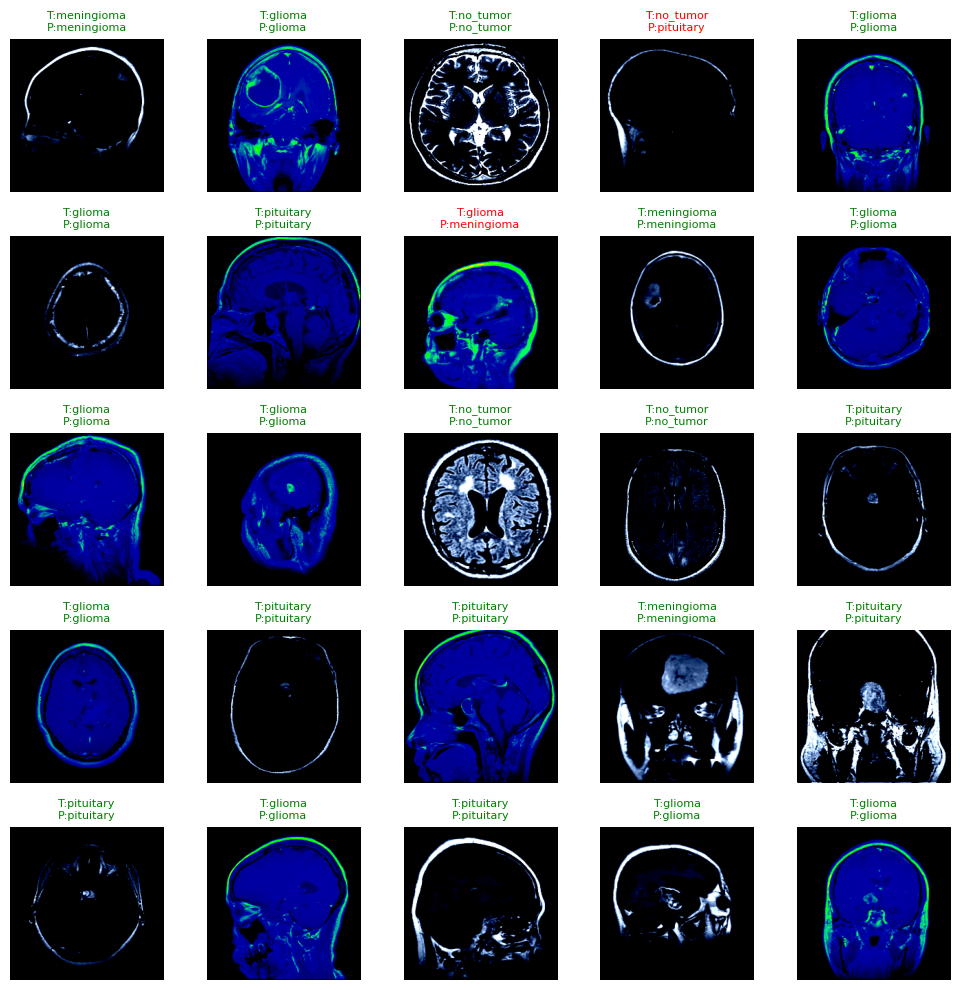

In [ ]:
visualize_random_samples(model, test_loader, class_names, device)

In [ ]:
def visualize_random_samples(model, loader, classes, device='cpu', n=25):
  model.eval()
  imgs_list, labels_list = [], []

  # Collect some random samples from the loader
  for imgs, labels in loader:
    imgs_list.append(imgs)
    labels_list.append(labels)

  imgs = torch.cat(imgs_list)
  labels = torch.cat(labels_list)

  # Pick random indices
  idxs = torch.randperm(len(imgs))[:n]
  imgs, labels = imgs[idxs], labels[idxs]
  imgs, labels = imgs.to(device), labels.to(device)

  outputs = model(imgs)
  _, preds = torch.max(outputs, 1)

  plt.figure(figsize=(10,10))
  for i in range(len(imgs)):
    plt.subplot(5,5,i+1)
    img = imgs[i].cpu().permute(1,2,0)
    # img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    img = img.clamp(0,1)
    plt.imshow(img)
    color = 'green' if preds[i] == labels[i] else 'red'
    plt.title(f"T:{classes[labels[i]]}\nP:{classes[preds[i]]}", color=color, fontsize=8)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

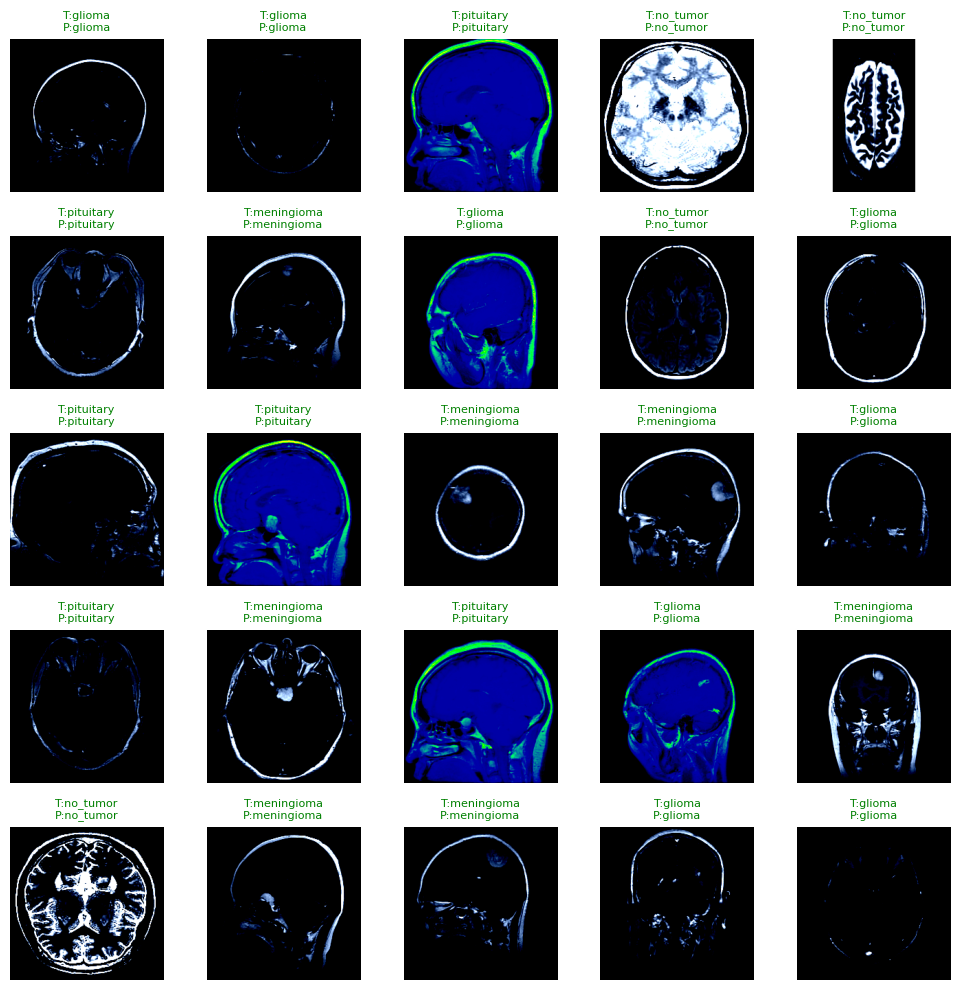

In [ ]:
visualize_random_samples(model, train_loader, class_names, device)

# 4. Saving, Loading and Testing model

In [ ]:
import os
import json
import requests
from io import BytesIO
from typing import Tuple, List, Optional

import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

In [ ]:
def save_checkpoint(model: torch.nn.Module, class_names: List[str], path: str):
  ckpt = {
      "state_dict": model.state_dict(),
      "class_names": class_names,
  }
  torch.save(ckpt, path)
  print(f"Checkpoint saved to: {path}")

def load_checkpoint(path: str, model_class, device: str = "cpu"):
  ckpt = torch.load(path, map_location=device)
  class_names = ckpt["class_names"]
  model = model_class(num_classes=len(class_names))
  model.load_state_dict(ckpt["state_dict"])
  model.to(device)
  model.eval()
  print(f"Loaded checkpoint from: {path} (num classes: {len(class_names)})")
  return model, class_names

def load_image_from_source(source: str) -> Image.Image:
  if source.startswith("http://") or source.startswith("https://"):
    resp = requests.get(source, timeout=10)
    resp.raise_for_status()
    img = Image.open(BytesIO(resp.content)).convert("RGB")
  else:
    if not os.path.exists(source):
      raise FileNotFoundError(f"Local file not found: {source}")
    img = Image.open(source).convert("RGB")
  return img

In [ ]:
DEFAULT_TRANSFORM = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
def predict_image(model: torch.nn.Module, img: Image.Image, device: str = "cpu",
                  transform: transforms.Compose = DEFAULT_TRANSFORM, topk: int = 3):

  model.eval()
  x = transform(img).unsqueeze(0).to(device, non_blocking=True)  # (1,C,H,W)
  with torch.no_grad():
    logits = model(x)
    probs = F.softmax(logits, dim=1)
    top_probs, top_idxs = probs.topk(topk, dim=1)
    top_probs = top_probs.cpu().squeeze(0).tolist()
    top_idxs = top_idxs.cpu().squeeze(0).tolist()
  return list(zip(top_idxs, top_probs))

In [ ]:
def predict_and_show(source: str,
                     model: torch.nn.Module,
                     class_names: List[str],
                     device: str = "cpu",
                     transform: transforms.Compose = DEFAULT_TRANSFORM,
                     root_dir: Optional[str] = None,
                     topk: int = 3):

  pil_img = load_image_from_source(source)

  true_label = None
  if not source.startswith("http://") and not source.startswith("https://"):
    parent = os.path.basename(os.path.dirname(os.path.abspath(source)))
    if parent in class_names:
      true_label = parent

  preds = predict_image(model, pil_img, device=device, transform=transform, topk=topk)
  preds_named = [(class_names[idx], prob) for idx, prob in preds]

  plt.figure(figsize=(8,4))

  ax = plt.subplot(1, 2, 1)
  ax.imshow(pil_img)
  ax.set_title("Input image")
  ax.axis("off")

  ax = plt.subplot(1, 2, 2)
  ax.imshow(pil_img)

  lines = []
  if true_label:
    lines.append(f"True: {true_label}")
  pred_top = preds_named[0]

  lines.append(f"Pred: {pred_top[0]}  ({pred_top[1]*100:.2f}%)")

  if topk > 1:
    for lbl, p in preds_named[1:]:
      lines.append(f"{lbl}: {p*100:.2f}%")

  ax.set_title("\n".join(lines), fontsize=9)
  ax.axis("off")

  plt.tight_layout()
  plt.show()

  return {
    "source": source,
    "true_label": true_label,
    "predictions": preds_named,
  }

In [ ]:
save_checkpoint(model, class_names, "brain_tumor_ckpt.pth")

Checkpoint saved to: brain_tumor_ckpt.pth


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model, class_names = load_checkpoint("brain_tumor_ckpt.pth", BrainTumorCNN, device=device)

Loaded checkpoint from: brain_tumor_ckpt.pth (num classes: 4)


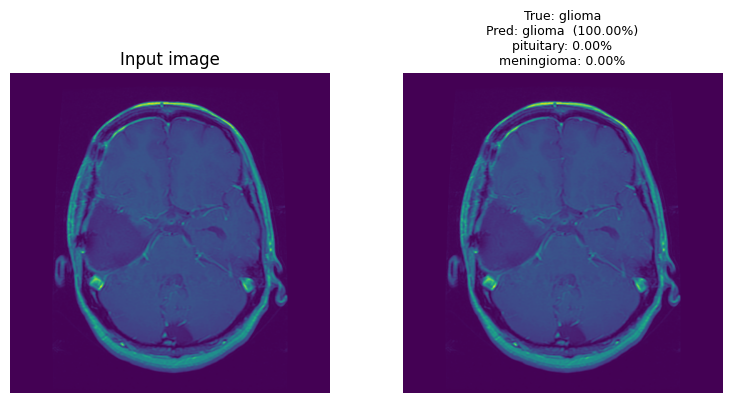

In [ ]:
# predict on a local image:
res = predict_and_show("/content/brain-tumor-dataset/glioma/glioma1004.png", model, class_names, device=device, root_dir="/content/brain-tumor-dataset")

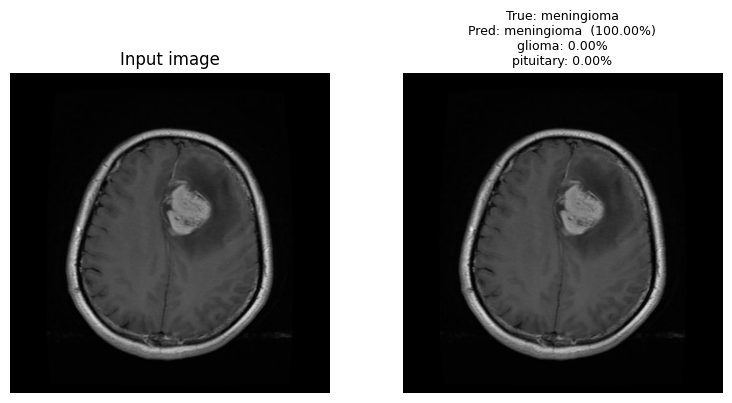

In [ ]:
res = predict_and_show("/content/brain-tumor-dataset/meningioma/meningioma1022.jpg", model, class_names, device=device, root_dir="/content/brain-tumor-dataset")

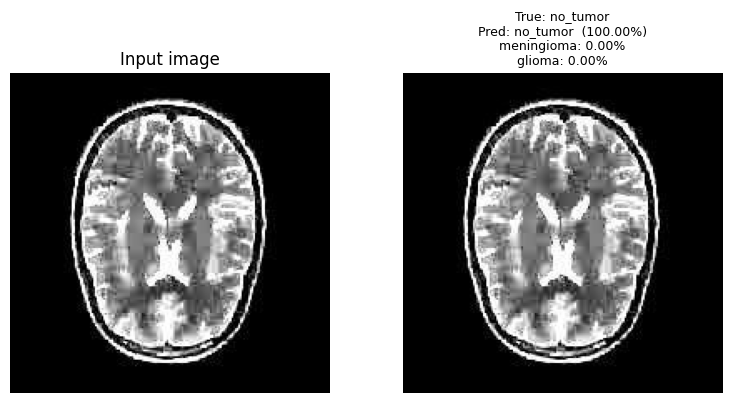

In [ ]:
res = predict_and_show("/content/brain-tumor-dataset/no_tumor/no_tumor1018.jpg", model, class_names, device=device, root_dir="/content/brain-tumor-dataset")

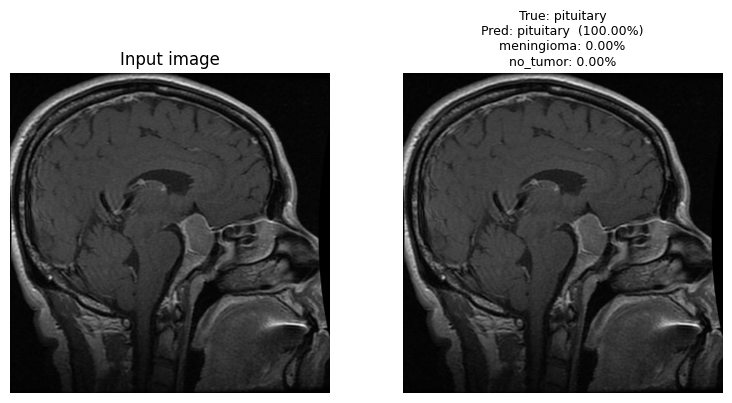

In [ ]:
res = predict_and_show("/content/brain-tumor-dataset/pituitary/pituitary1000.jpg", model, class_names, device=device, root_dir="/content/brain-tumor-dataset")

# Model introspection

In [96]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [97]:
imgs, labels = next(iter(train_loader))
imgs, labels = imgs.to(device), labels.to(device)

print(imgs.shape, labels.shape)

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [98]:
labels

tensor([3, 3, 3, 0, 1, 2, 0, 0, 3, 0, 1, 0, 2, 3, 0, 3, 2, 3, 3, 2, 0, 2, 1, 0,
        0, 2, 0, 0, 3, 3, 3, 3], device='cuda:0')

In [100]:
x = imgs
print("Before conv1:", x.shape)
x = F.relu(model.conv1(x))
print("After conv1:", x.shape)

Before conv1: torch.Size([32, 3, 224, 224])
After conv1: torch.Size([32, 32, 226, 226])


In [101]:
x = model.pool(x)
print("After pool1:", x.shape)

After pool1: torch.Size([32, 32, 113, 113])


In [102]:
x = F.relu(model.conv2(x))
x = model.pool(x)
print("After conv2 + pool2:", x.shape)

After conv2 + pool2: torch.Size([32, 64, 56, 56])


In [103]:
x = F.relu(model.conv3(x))
x = model.pool(x)
print("After conv3 + pool3:", x.shape)

After conv3 + pool3: torch.Size([32, 128, 28, 28])


In [104]:
x = x.view(x.size(0), -1)
print("After flatten:", x.shape)

After flatten: torch.Size([32, 100352])


In [105]:
x = F.relu(model.fc1(x))
print("After fc1:", x.shape)

logits = model.fc2(x)
print("After fc2 (logits):", logits.shape)

After fc1: torch.Size([32, 256])
After fc2 (logits): torch.Size([32, 4])


In [106]:
logits

tensor([[-20.0684, -15.0632,  -8.0106,  24.3962],
        [ -6.7260, -13.2265, -19.0736,  27.5204],
        [-31.3014,  -7.3916,  -9.8760,  25.0876],
        [  9.0330,  -5.1816,  -8.2496,  -4.9127],
        [ -3.4907,  14.1031, -13.6079, -13.4210],
        [ -1.5091, -15.9439,  33.7103, -27.6325],
        [ 13.2551,  -2.5708, -11.5701, -16.7226],
        [ 14.1641,   3.3730, -19.1201, -16.6288],
        [-15.7387,  -9.8351, -10.4572,  22.8830],
        [ 13.2033,   1.2951, -16.9423, -12.1707],
        [  0.0898,  14.9538, -21.9999, -12.1635],
        [ 21.5085,  -4.7194, -14.0869, -29.7532],
        [ -3.8354,   4.3438,  30.6569, -40.8868],
        [-29.1723, -16.1522, -14.4034,  27.3036],
        [ 26.1836, -11.6906, -16.0130, -24.4747],
        [-17.5452, -10.1683, -12.5763,  20.1897],
        [ -0.1982, -16.7059,  34.6749, -27.5833],
        [-21.1612, -14.6940, -11.3949,  26.7435],
        [ -6.6047,   1.0481, -23.4877,  13.6996],
        [-12.3801,  -1.8538,  26.0885, -25.8666],


Each row in the tensor corresponds to one input image in your batch.
Each column corresponds to one output class — since you have 4 tumor classes:

```
class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
```

So each row has 4 numbers:
[score_for_glioma, score_for_meningioma, score_for_no_tumor, score_for_pituitary]

In [107]:
logits.shape

torch.Size([32, 4])

In [110]:
torch.softmax(logits, dim=1).argmax(dim=1)

tensor([3, 3, 3, 0, 1, 2, 0, 0, 3, 0, 1, 0, 2, 3, 0, 3, 2, 3, 3, 2, 0, 2, 1, 0,
        0, 2, 0, 0, 3, 3, 3, 3], device='cuda:0')

In [111]:
loss = criterion(logits, labels)

loss

tensor(7.1481e-05, device='cuda:0', grad_fn=<NllLossBackward0>)

In [112]:
torch.max(logits, 1) # Find the maximum value and its index along dim=1 (i.e., across the class dimension for each image in the batch)

torch.return_types.max(
values=tensor([24.3962, 27.5204, 25.0876,  9.0330, 14.1031, 33.7103, 13.2551, 14.1641,
        22.8830, 13.2033, 14.9538, 21.5085, 30.6569, 27.3036, 26.1836, 20.1897,
        34.6749, 26.7435, 13.6996, 26.0885, 14.3398, 16.1426, 12.2500, 12.4476,
        15.7765, 19.0007, 12.2833, 12.7084, 20.9289, 20.1001, 33.1462, 32.2887],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([3, 3, 3, 0, 1, 2, 0, 0, 3, 0, 1, 0, 2, 3, 0, 3, 2, 3, 3, 2, 0, 2, 1, 0,
        0, 2, 0, 0, 3, 3, 3, 3], device='cuda:0'))

In [113]:
_, preds = torch.max(logits, 1)

print("Predictions", preds)
print("\nTrue labels:", labels)

Predictions tensor([3, 3, 3, 0, 1, 2, 0, 0, 3, 0, 1, 0, 2, 3, 0, 3, 2, 3, 3, 2, 0, 2, 1, 0,
        0, 2, 0, 0, 3, 3, 3, 3], device='cuda:0')

True labels: tensor([3, 3, 3, 0, 1, 2, 0, 0, 3, 0, 1, 0, 2, 3, 0, 3, 2, 3, 3, 2, 0, 2, 1, 0,
        0, 2, 0, 0, 3, 3, 3, 3], device='cuda:0')


In [114]:
optimizer.zero_grad()
loss.backward()

for name, param in model.named_parameters():
  if param.grad is not None:
    print(f"{name}: grad mean={param.grad.mean():.6f}, std={param.grad.std():.6f}")
    break  # just show first layer for brevity

conv1.weight: grad mean=-0.000050, std=0.000469


In [115]:
optimizer.step()

In [116]:
with torch.no_grad():
  new_logits = model(imgs)
  new_loss = criterion(new_logits, labels)

print("Old loss:", loss.item())
print("New loss after 1 update:", new_loss.item())

Old loss: 7.148089207476005e-05
New loss after 1 update: 3.2409988648396393e-07


# Conclusion: Step-by-Step CNN Walkthrough

In this notebook, we built and understood a **Convolutional Neural Network (CNN)** for brain tumor classification, covering major stage of the deep learning workflow, from data flow to predictions.

---

### Model Summary
- The model processes MRI images through **three convolutional blocks** (Conv → ReLU → MaxPool), extracting spatial features.
- These features are flattened and passed through **fully connected layers** to produce raw outputs called **logits**.
- Logits represent the model’s **unnormalized confidence scores** for each tumor class:
  - Glioma  
  - Meningioma  
  - No Tumor  
  - Pituitary

---

Each tumor class was analyzed individually:
- **Pituitary:** ≈ 98.7%  
- **No Tumor:** ≈ 96.6%  
- **Glioma:** ≈ 93.8%  
- **Meningioma:** ≈ 90.6%  

| Metric | Value |
|:--------|:-------|
| **Overall Test Accuracy** | ~94–96% |
| **Best Class Performance** | Pituitary Tumor |
| **Loss Function** | CrossEntropyLoss |
| **Optimizer** | Adam |

<br>

We successfully:
- Designed, trained, and validated a CNN for **brain tumor detection**.
- Understood every internal step — from raw data → feature extraction → classification.
- Visualized metrics, predictions, and learned representations.
